# ■shot map 그리기

# 241009 
1. 일단 시작
2. 엑셀데이터 불러오기
3. chip구분 : RawData-1의 CHIP_X_NUM 를 불러오는것으로 처리. 

4. chip_x_num = int(df['CHIP_X_NUM'].iloc[0]) =>   chip배열이 다른 제품은 대응이 안됨. 
   chip배열이 다르더라도 대응되게 수정.  (동적 칩 배열을 각 측정 포인트마다 그리게)


   

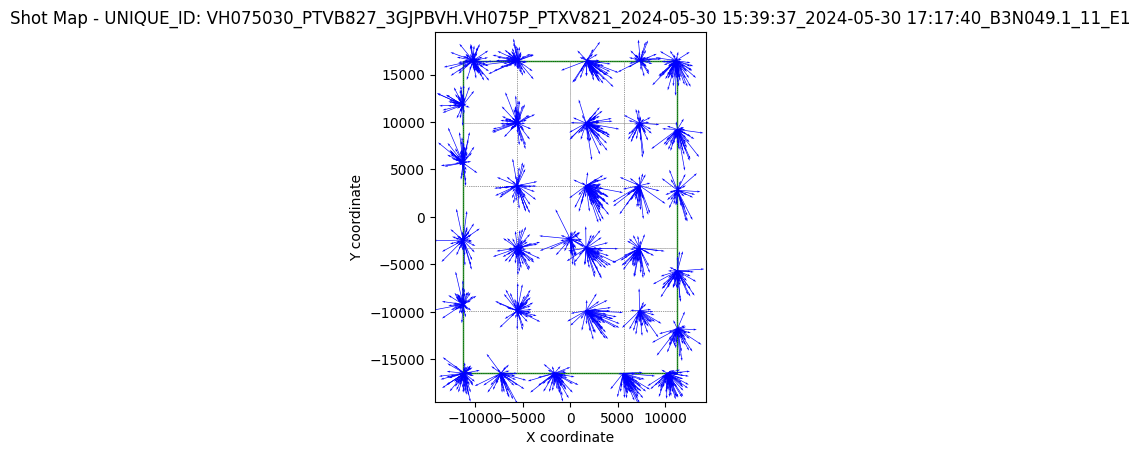

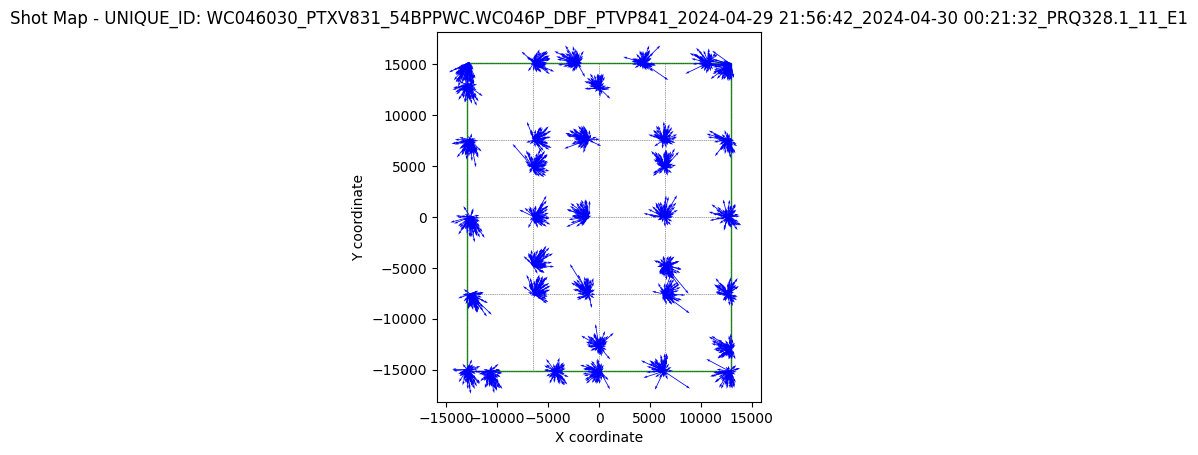

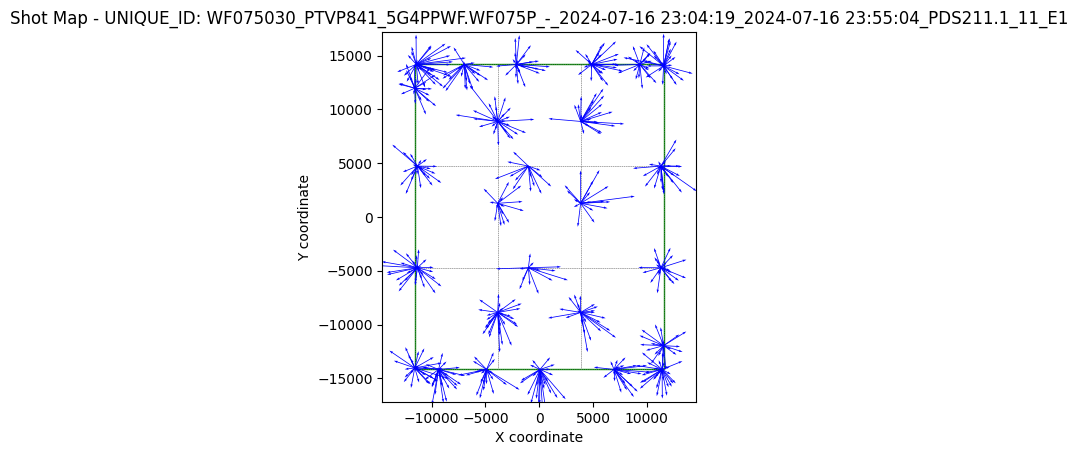

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

# 데이터 불러오기
file_path = 'RawData-1.csv'  # 파일 경로
df = pd.read_csv(file_path)

# UNIQUE_ID 별로 그룹화하여 개별 플롯 생성
unique_ids = df['UNIQUE_ID'].unique()

# UNIQUE_ID 별로 데이터를 분리하고, 개별 플롯을 생성
for unique_id in unique_ids:
    df_subset = df[df['UNIQUE_ID'] == unique_id]
    
    # 데이터 값들
    step_pitch_x = df_subset['STEP_PITCH_X'].iloc[0]
    step_pitch_y = df_subset['STEP_PITCH_Y'].iloc[0]
    coordinate_x = df_subset['coordinate_X']
    coordinate_y = df_subset['coordinate_Y']
    x_reg = df_subset['X_reg']
    y_reg = df_subset['Y_reg']
    chip_x_num = int(df_subset['CHIP_X_NUM'].iloc[0])
    chip_y_num = int(df_subset['CHIP_Y_NUM'].iloc[0])
    
    # shot의 중심 좌표
    shot_center_x = 0
    shot_center_y = 0

    # shot의 모서리 좌표 계산
    shot_left = shot_center_x - step_pitch_x / 2
    shot_bottom = shot_center_y - step_pitch_y / 2

    # chip의 크기 계산
    chip_width = step_pitch_x / chip_x_num
    chip_height = step_pitch_y / chip_y_num

    # 그림 그리기
    fig, ax = plt.subplots()

    # shot 사각형 그리기
    shot_rect = patches.Rectangle((shot_left, shot_bottom), step_pitch_x, step_pitch_y,
                                  linewidth=1, edgecolor='green', facecolor='none')
    ax.add_patch(shot_rect)

    # chip 경계선 점선으로 추가
    for i in range(chip_x_num):
        for j in range(chip_y_num):
            chip_left = shot_left + i * chip_width
            chip_bottom = shot_bottom + j * chip_height
            chip_rect = patches.Rectangle((chip_left, chip_bottom), chip_width, chip_height,
                                          linewidth=0.5, edgecolor='grey', linestyle='dotted', facecolor='none')
            ax.add_patch(chip_rect)

    # overlay 측정 포인트에서 벡터 화살표로 표시 (quiver 사용)
    ax.quiver(coordinate_x, coordinate_y, x_reg, y_reg, 
              angles='xy', scale_units='xy', scale=1e-6, color='blue')

    # 그래프 설정
    ax.set_xlim(shot_left - 3000, shot_left + step_pitch_x + 3000)
    ax.set_ylim(shot_bottom - 3000, shot_bottom + step_pitch_y + 3000)
    ax.set_aspect('equal')
    ax.set_xlabel('X coordinate')
    ax.set_ylabel('Y coordinate')
    ax.set_title(f'Shot Map - UNIQUE_ID: {unique_id}')

    # 플롯 보여주기
    plt.show()

